In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# enumerate frames
manual_data_pd = pd.read_csv("data.csv", dtype="float", na_values=(-1))
manual_data = np.array(manual_data_pd)

In [3]:
k = 0.1 # koeff persentage to N
frame_n = np.arange(0,4488)
frame_force = np.interp(frame_n, manual_data[:,0], manual_data[:,1]) * k

In [4]:
def plot(x, y):
    plt.figure(figsize=(20,5))
    plt.plot(x, y)
    plt.show()

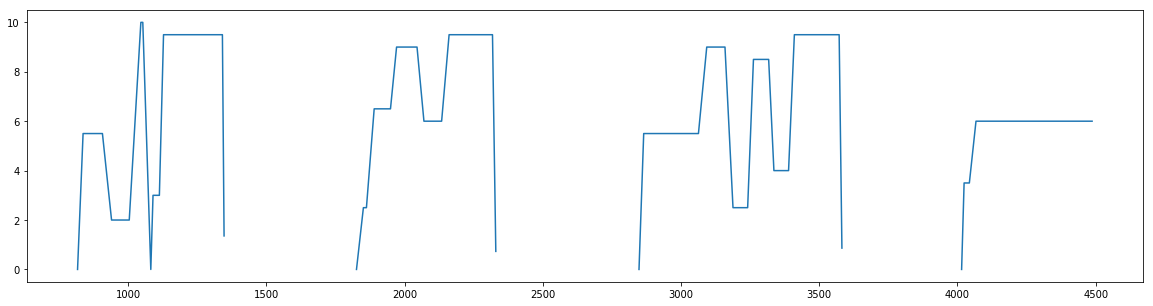

In [5]:
plot(frame_n, frame_force)

In [6]:
def exponential_smoothing(y, alpha=0.1):
    n = len(y)
    ans = np.zeros(n)
    ans[0] = y[0]
    for i in range(1,n):
        if y[i - 1] is np.nan or y[i] is np.nan:
            ans[i] = y[i]
        else:
            ans[i] = y[i - 1]  * (1 - alpha) + y[i] * alpha
    return ans

def forward_backward_exponential_smoothing(y, alpha=0.1):
    return exponential_smoothing(exponential_smoothing(y, alpha)[::-1], alpha)[::-1]

def add_noise(y, standard_deviation):
    return y + np.random.normal(0, standard_deviation, len(y))

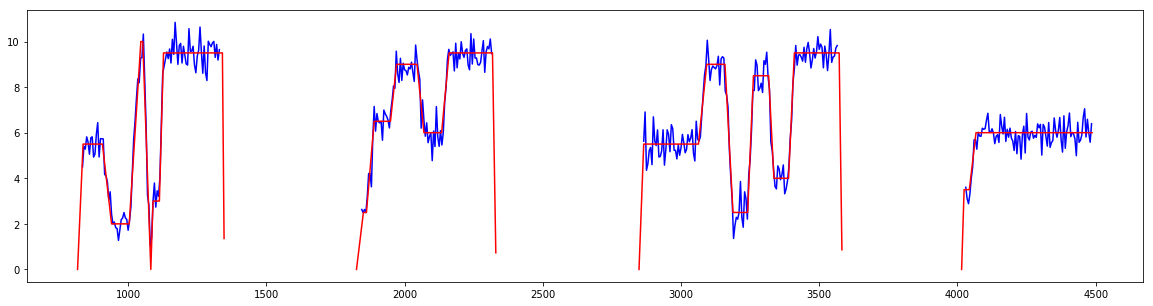

In [12]:
step = 5
frame_force_smooth = forward_backward_exponential_smoothing(frame_force[::step], 0.1)
frame_force_smooth = forward_backward_exponential_smoothing(frame_force_smooth, 0.2)
frame_force_smooth = forward_backward_exponential_smoothing(frame_force_smooth, 0.1)

frame_force_noisy = add_noise(frame_force_smooth, .5)

plt.figure(figsize=(20,5))
plt.plot(frame_n[::step], frame_force_noisy, "b")
plt.plot(frame_n, frame_force, "r")
plt.show()